In [2]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

In [3]:
import warnings

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from category_encoders import LeaveOneOutEncoder

# Import supervised model types here:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
# define where to find the data
path = "data/Video_Games_Sales_as_at_22_Dec_2016.csv"

<IPython.core.display.Javascript object>

## Data From: Kaggle:
## Video Game Sales and Ratings
### Video game sales data from VGChartz with corresponding ratings from Metacritic
### Kendall Gillies,  Rush Kirubi

In [91]:
df = pd.read_csv(path)  # move data into a pandas dataframe
df.head()  # preview the top five rows

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Javascript object>

In [92]:
df.isna().mean().sort_values(ascending=False)

User_Count         0.546025
User_Score         0.546025
Critic_Count       0.513308
Critic_Score       0.513308
Rating             0.404869
Developer          0.396136
Year_of_Release    0.016089
Publisher          0.003230
Genre              0.000120
Name               0.000120
Global_Sales       0.000000
Other_Sales        0.000000
JP_Sales           0.000000
EU_Sales           0.000000
NA_Sales           0.000000
Platform           0.000000
dtype: float64

<IPython.core.display.Javascript object>

In [93]:
notnone = df["User_Count"].isna()
df = df.iloc[~notnone.values]

<IPython.core.display.Javascript object>

In [94]:
df.shape

(7590, 16)

<IPython.core.display.Javascript object>

In [95]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E


<IPython.core.display.Javascript object>

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7590 entries, 0 to 16709
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             7590 non-null   object 
 1   Platform         7590 non-null   object 
 2   Year_of_Release  7463 non-null   float64
 3   Genre            7590 non-null   object 
 4   Publisher        7584 non-null   object 
 5   NA_Sales         7590 non-null   float64
 6   EU_Sales         7590 non-null   float64
 7   JP_Sales         7590 non-null   float64
 8   Other_Sales      7590 non-null   float64
 9   Global_Sales     7590 non-null   float64
 10  Critic_Score     7017 non-null   float64
 11  Critic_Count     7017 non-null   float64
 12  User_Score       7590 non-null   float64
 13  User_Count       7590 non-null   float64
 14  Developer        7579 non-null   object 
 15  Rating           7504 non-null   object 
dtypes: float64(10), object(6)
memory usage: 1008.0+ KB


<IPython.core.display.Javascript object>

In [97]:
df.isna().mean().sort_values(ascending=False)

Critic_Count       0.075494
Critic_Score       0.075494
Year_of_Release    0.016733
Rating             0.011331
Developer          0.001449
Publisher          0.000791
User_Count         0.000000
User_Score         0.000000
Global_Sales       0.000000
Other_Sales        0.000000
JP_Sales           0.000000
EU_Sales           0.000000
NA_Sales           0.000000
Genre              0.000000
Platform           0.000000
Name               0.000000
dtype: float64

<IPython.core.display.Javascript object>

In [98]:
df = df.dropna(axis=0)

<IPython.core.display.Javascript object>

In [99]:
df = df.astype({"Year_of_Release": "int64"})

<IPython.core.display.Javascript object>

In [100]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E
11,Mario Kart DS,DS,2005,Racing,Nintendo,9.71,7.47,4.13,1.90,23.21,91.0,64.0,8.6,464.0,Nintendo,E
13,Wii Fit,Wii,2007,Sports,Nintendo,8.92,8.03,3.60,2.15,22.70,80.0,63.0,7.7,146.0,Nintendo,E
14,Kinect Adventures!,X360,2010,Misc,Microsoft Game Studios,15.00,4.89,0.24,1.69,21.81,61.0,45.0,6.3,106.0,Good Science Studio,E
15,Wii Fit Plus,Wii,2009,Sports,Nintendo,9.01,8.49,2.53,1.77,21.79,80.0,33.0,7.4,52.0,Nintendo,E


<IPython.core.display.Javascript object>

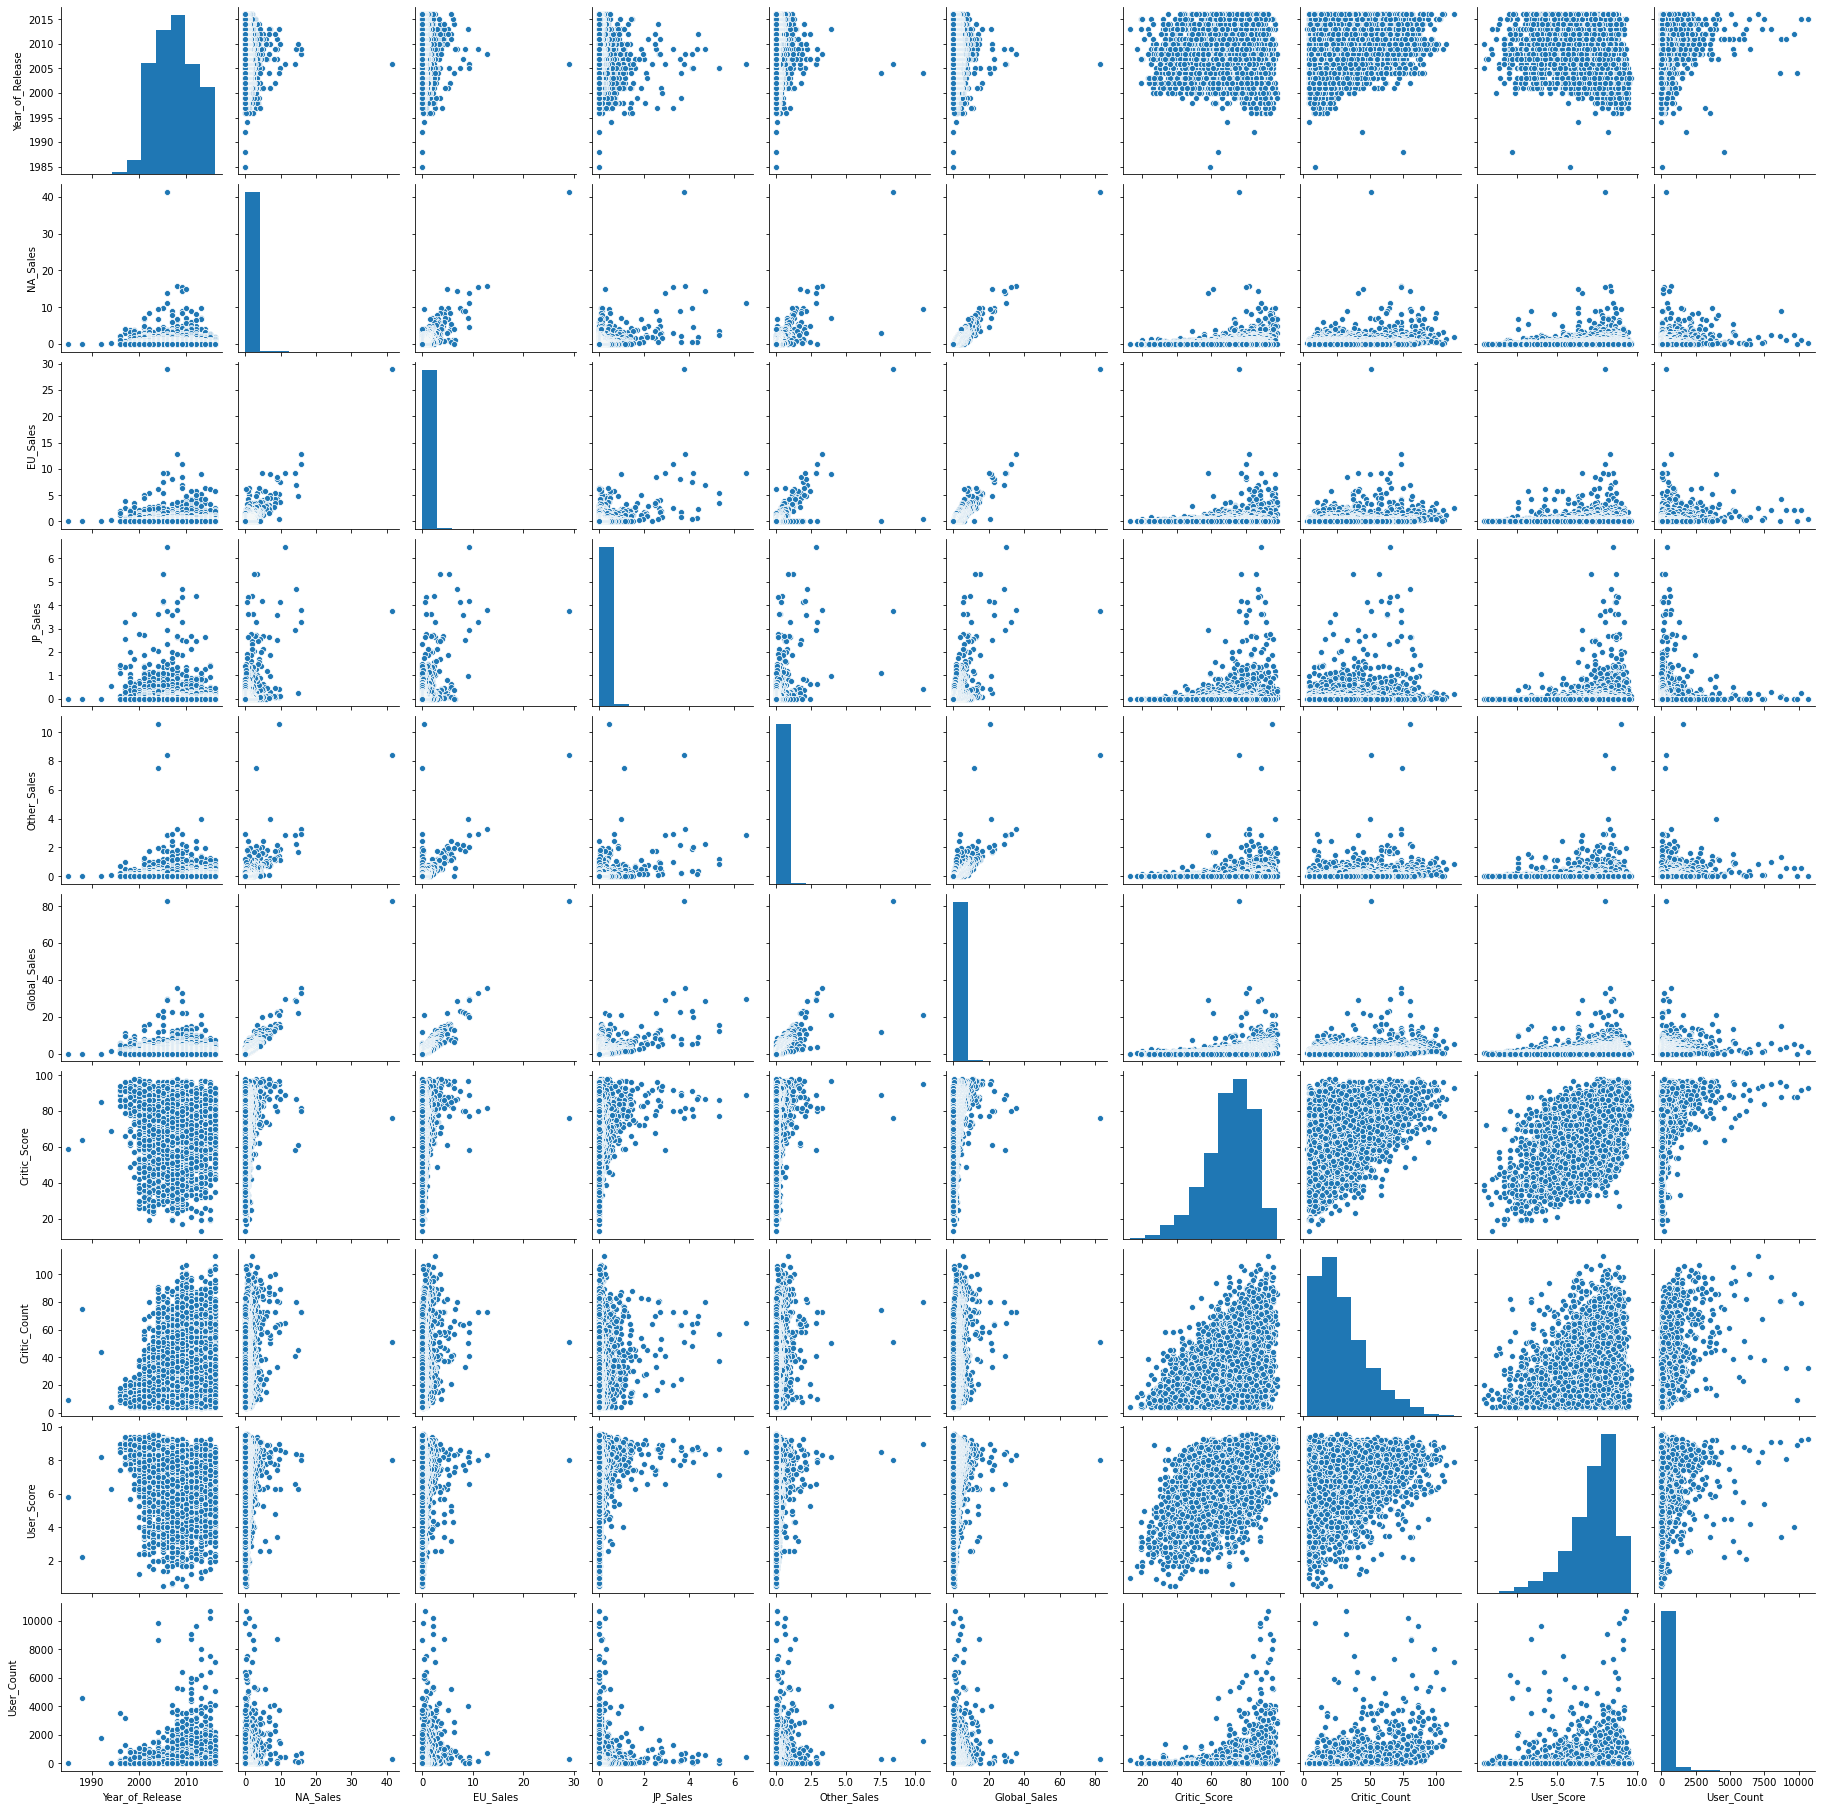

<IPython.core.display.Javascript object>

In [55]:
sns.pairplot(data=df)
plt.show()

In [182]:
df_global = df.drop(columns=["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"])

<IPython.core.display.Javascript object>

In [ ]:
df_global['LOG(Sales)'] = np.log(df_glob[''])

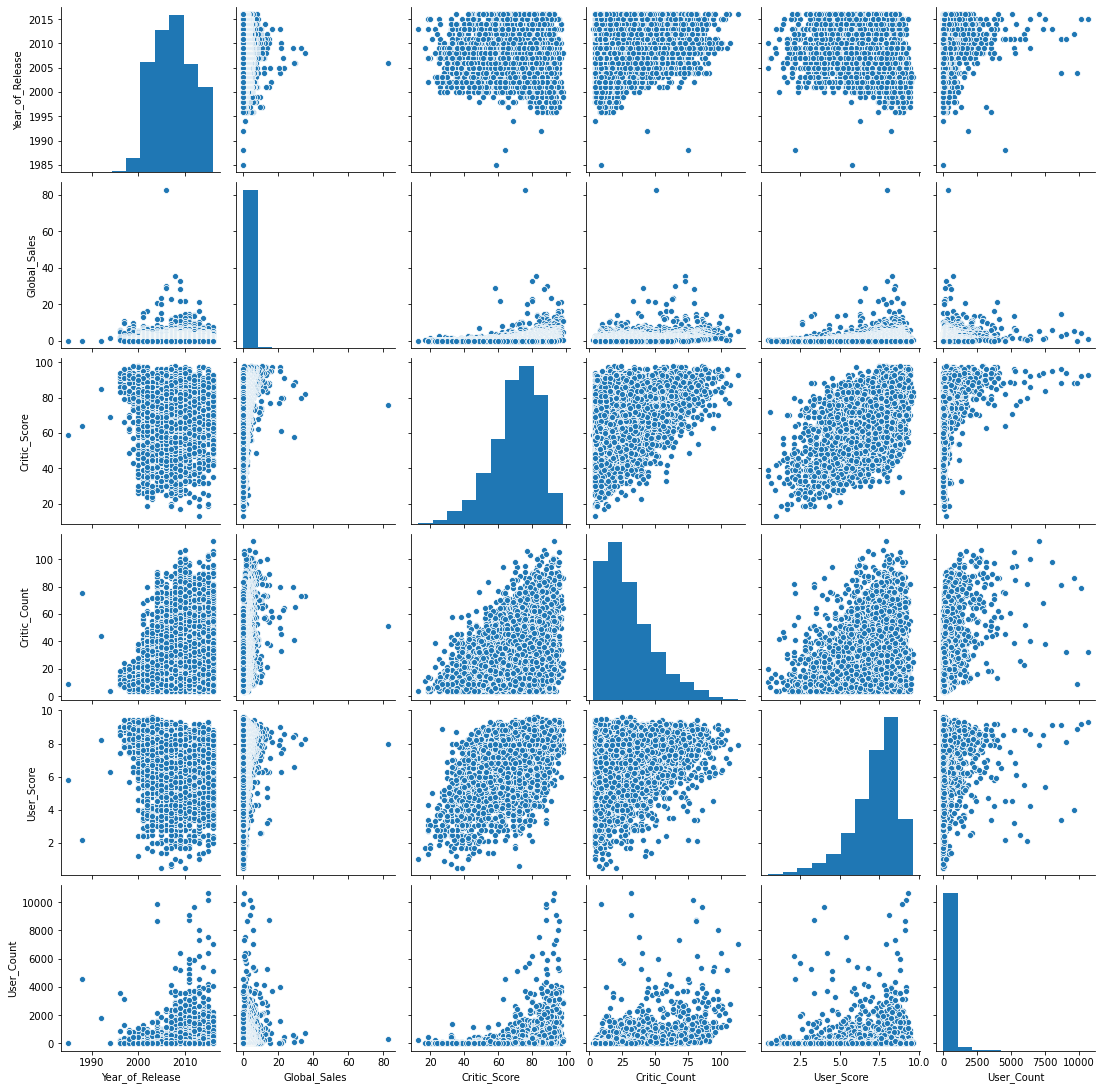

<IPython.core.display.Javascript object>

In [59]:
sns.pairplot(data=df_global)
plt.show()

In [89]:
df['Global_Sales'].describe()


count    6824.000000
mean        0.765610
std         1.695872
min         0.010000
25%         0.110000
50%         0.290000
75%         0.750000
max        35.520000
Name: Global_Sales, dtype: float64

<IPython.core.display.Javascript object>

In [90]:
df_global.sort_values(by="Global_Sales", ascending=False).head(20)

,Name,Platform,Year_of_Release,Genre,Publisher,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,32.77,80.0,73.0,8.0,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006,Misc,Nintendo,28.92,58.0,41.0,6.6,129.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,28.32,87.0,80.0,8.4,594.0,Nintendo,E
11,Mario Kart DS,DS,2005,Racing,Nintendo,23.21,91.0,64.0,8.6,464.0,Nintendo,E
13,Wii Fit,Wii,2007,Sports,Nintendo,22.70,80.0,63.0,7.7,146.0,Nintendo,E
14,Kinect Adventures!,X360,2010,Misc,Microsoft Game Studios,21.81,61.0,45.0,6.3,106.0,Good Science Studio,E
15,Wii Fit Plus,Wii,2009,Sports,Nintendo,21.79,80.0,33.0,7.4,52.0,Nintendo,E
16,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,21.04,97.0,50.0,8.2,3994.0,Rockstar North,M


<IPython.core.display.Javascript object>

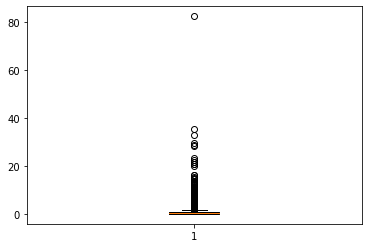

<IPython.core.display.Javascript object>

In [64]:
plt.boxplot(x="Global_Sales", data=df)
plt.show()

In [101]:
df = df[df["Name"] != "Wii Sports"]

<IPython.core.display.Javascript object>

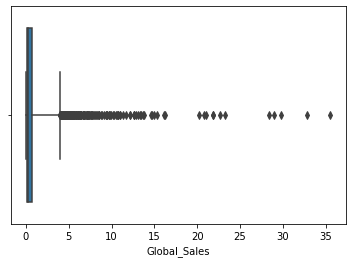

<IPython.core.display.Javascript object>

In [102]:
sns.boxplot(df["Global_Sales"], whis=5)
plt.show()

In [103]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

<IPython.core.display.Javascript object>

In [161]:
wantedRatings =( df.Rating == 'E') | (df.Rating == 'M') | (df.Rating == 'T')|(df.Rating == 'E10+')
df = df.iloc[wantedRatings.values]


<IPython.core.display.Javascript object>

In [174]:
df.Rating.value_counts()

T       2377
E       2081
M       1433
E10+     930
Name: Rating, dtype: int64

<IPython.core.display.Javascript object>

In [175]:
drop_cols = [
    "Name",
    "NA_Sales",
    "EU_Sales",
    "JP_Sales",
    "Other_Sales",
    "Global_Sales",
    "Publisher",
    "Developer",
]

X = df.drop(columns=drop_cols)
y = np.log(df["Global_Sales"])

<IPython.core.display.Javascript object>

In [176]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=X.Rating
)

<IPython.core.display.Javascript object>

In [106]:
print(df.Platform.unique())
print(df.Genre.unique())
print(df.Publisher.unique())
print(df.Developer.unique())
print(df.Rating.unique())

['Wii' 'DS' 'X360' 'PS3' 'PS2' '3DS' 'PS4' 'PS' 'XB' 'PC' 'PSP' 'WiiU'
 'GC' 'GBA' 'XOne' 'PSV' 'DC']
['Racing' 'Sports' 'Platform' 'Misc' 'Action' 'Puzzle' 'Shooter'
 'Fighting' 'Simulation' 'Role-Playing' 'Adventure' 'Strategy']
['Nintendo' 'Microsoft Game Studios' 'Take-Two Interactive'
 'Sony Computer Entertainment' 'Activision' 'Ubisoft' 'Bethesda Softworks'
 'Electronic Arts' 'SquareSoft' 'GT Interactive'
 'Konami Digital Entertainment' 'Square Enix'
 'Sony Computer Entertainment Europe' 'Virgin Interactive' 'LucasArts'
 '505 Games' 'Capcom' 'Warner Bros. Interactive Entertainment'
 'Universal Interactive' 'RedOctane' 'Atari' 'Eidos Interactive'
 'Namco Bandai Games' 'Vivendi Games' 'MTV Games' 'Sega' 'THQ'
 'Disney Interactive Studios' 'Acclaim Entertainment' 'Midway Games'
 'Deep Silver' 'NCSoft' 'Tecmo Koei' 'Valve Software' 'Infogrames'
 'Mindscape' 'Valve' 'Hello Games' 'Global Star' 'Gotham Games'
 'Crave Entertainment' 'Hasbro Interactive' 'Codemasters' 'TDK Mediactive'
 '

<IPython.core.display.Javascript object>

In [129]:
X_train.head(2)

,Platform,Year_of_Release,Genre,Critic_Score,Critic_Count,User_Score,User_Count,Rating
2161,X360,2008,Platform,60.0,50.0,7.8,238.0,E10+
2978,PS3,2010,Platform,85.0,46.0,8.8,172.0,E10+


<IPython.core.display.Javascript object>

In [177]:
num_cols = [
    "Year_of_Release",
    "User_Count",
    "User_Score",
    "Critic_Count",
    "Critic_Score",
]
bin_cols = []
cat_cols = ["Platform", "Genre", "Rating"]
drop_cats = ["PS4", "Sports", "E"]

<IPython.core.display.Javascript object>

In [179]:
# fmt: off
preprocessing = ColumnTransformer([
    ("scale", StandardScaler(), num_cols),
    ("encode_cats", OneHotEncoder(drop=drop_cats), cat_cols),
], remainder="passthrough")

<IPython.core.display.Javascript object>

In [191]:
# fmt: off
params = {
    "model__subsample": [ 0.5, 0.75, 1],
    "model__colsample_bytree": [ 0.5, 0.75, 1],
    "model__max_depth": [5, 7, 10, 14],
}
n_trees = 100
learning_rate = 2 / n_trees


pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("model", XGBRegressor(n_estimators = n_trees, learning_rate = learning_rate)),
#     ("model", Lasso()),
])

<IPython.core.display.Javascript object>

In [192]:
pipeline_cv = GridSearchCV(pipeline, params, verbose=1, n_jobs=-1, cv=2)

<IPython.core.display.Javascript object>

In [193]:
pipeline_cv.fit(X_train, y_train)

print(f"Train Score: {pipeline_cv.score(X_train, y_train)}")
print(f"Test Score: {pipeline_cv.score(X_test, y_test)}")

Fitting 2 folds for each of 36 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:  1.7min finished


Train Score: 0.6935749453077646
Test Score: 0.49003703727765935


<IPython.core.display.Javascript object>

In [194]:
pipeline_cv.best_params_

{'model__colsample_bytree': 1, 'model__max_depth': 10, 'model__subsample': 0.5}

<IPython.core.display.Javascript object>

In [196]:
y_pred = pipeline_cv.predict(X_test)
y_pred_exp = np.exp(y_pred)
y_test_exp = np.exp(y_test)
MAE = np.mean(abs(y_test_exp-y_pred_exp))
MAPE = np.mean(abs((y_test_exp-y_pred_exp)/y_test_exp))
print(MAE)
print(MAPE)


0.44089704998006807
1.5200137687870021


<IPython.core.display.Javascript object>

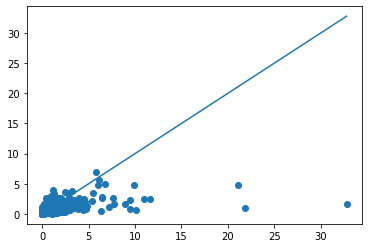

<IPython.core.display.Javascript object>

In [197]:
plt.scatter(y_test_exp, y_pred_exp)
plt.plot([y_test_exp.min(), y_test_exp.max()], [y_test_exp.min(), y_test_exp.max()])
plt.show()